In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

<ipython-input-1-0c95b2fc7292>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
pip install pyqt5

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\YSKIM\\anaconda3\\Lib\\site-packages\\PyQt5\\QtCore.pyd'
Consider using the `--user` option or check the permissions.




  Using cached PyQt5-5.15.6-cp36-abi3-win_amd64.whl (6.7 MB)


In [3]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                index_col=[0],
                parse_dates=[0],
                date_parser=parser)
df.head()

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<AxesSubplot:xlabel='Datetime'>

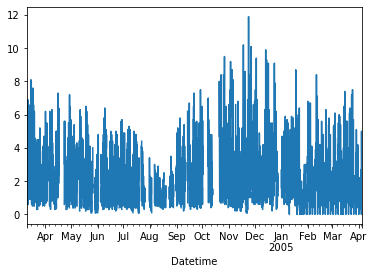

In [4]:
df['CO(GT)'].plot()

<AxesSubplot:xlabel='Datetime'>

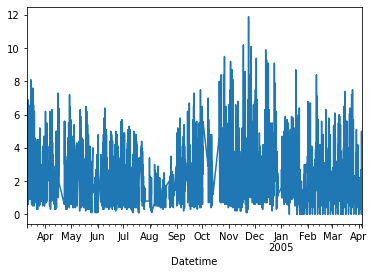

In [5]:
co = df['CO(GT)'].copy()
co.interpolate(inplace=True)

co.plot()

Text(0.5, 0, 'CO(GT)')

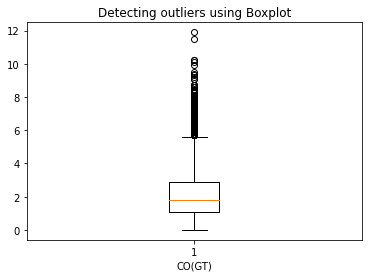

In [6]:
plt.boxplot(co)
plt.title('Detecting outliers using Boxplot')
plt.xlabel('CO(GT)')

In [7]:
corr_matrix = df.corr()
print(corr_matrix)

                 CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
CO(GT)         1.000000     0.877203       0.914973  0.792557     -0.701703   
PT08.S1(CO)    0.877203     1.000000       0.892964  0.713654     -0.771938   
PT08.S2(NMHC)  0.914973     0.892964       1.000000  0.704435     -0.796703   
NOx(GT)        0.792557     0.713654       0.704435  1.000000     -0.655707   
PT08.S3(NOx)  -0.701703    -0.771938      -0.796703 -0.655707      1.000000   
NO2(GT)        0.679262     0.641529       0.646245  0.763111     -0.652083   
PT08.S4(NO2)   0.639470     0.682881       0.777254  0.233731     -0.538468   
PT08.S5(O3)    0.851403     0.899324       0.880578  0.787046     -0.796569   
RH             0.040218     0.114606      -0.090380  0.221032     -0.056740   
AH             0.065809     0.135324       0.186933 -0.149323     -0.232017   
C6H6(GT)       0.845144     0.883795       0.981950  0.626638     -0.735744   

                NO2(GT)  PT08.S4(NO2)  PT08.S5(O3) 

<AxesSubplot:xlabel='Datetime'>

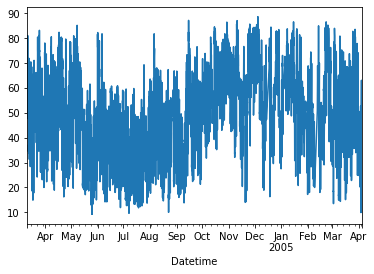

In [8]:
rh = df['RH'].copy().interpolate() #RH(Relative Humidity)
rh.plot()

Text(0, 0.5, 'RH')

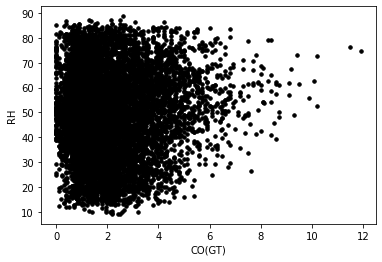

In [9]:
plt.scatter(co, rh, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel('RH')

<AxesSubplot:xlabel='Datetime'>

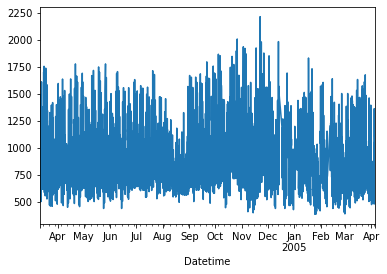

In [10]:
nmhc = df['PT08.S2(NMHC)'].copy().interpolate()
nmhc.plot()

Text(0, 0.5, 'PT08.S2(NMHC)')

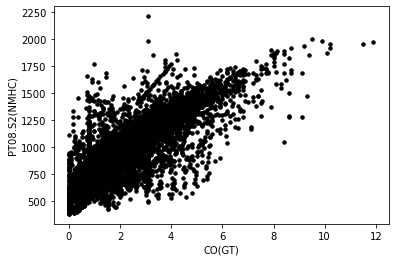

In [11]:
plt.scatter(co, nmhc, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel('PT08.S2(NMHC)')

In [17]:
q1 = co.quantile(0.25)
median = co.quantile(0.5)
q3 = co.quantile(0.75)
print(q1, median, q3)

1.1 1.8 2.9


In [18]:
iqr = q3-q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print(upper_fence, lower_fence)

5.6 -1.5999999999999996


In [33]:
outliers = co.loc[(co > upper_fence) | (co < 0)]
print(outliers)

Datetime
2004-03-11 19:00:00    6.9
2004-03-11 20:00:00    6.1
2004-03-12 20:00:00    6.6
2004-03-14 20:00:00    5.9
2004-03-15 09:00:00    8.1
                      ... 
2005-03-23 19:00:00    6.2
2005-03-23 20:00:00    7.2
2005-03-24 19:00:00    5.9
2005-03-24 20:00:00    7.5
2005-03-25 19:00:00    5.7
Name: CO(GT), Length: 224, dtype: float64


In [34]:
mask = co.index.isin(outliers.index)
mask

array([False, False, False, ..., False, False, False])

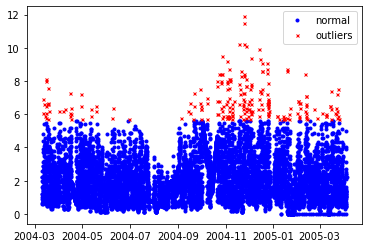

In [35]:
plt.plot(co[~mask], label='normal', color='blue',
        marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
        marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

Datetime
2004-03-11 19:00:00   NaN
2004-03-11 20:00:00   NaN
2004-03-12 20:00:00   NaN
2004-03-14 20:00:00   NaN
2004-03-15 09:00:00   NaN
                       ..
2005-03-23 19:00:00   NaN
2005-03-23 20:00:00   NaN
2005-03-24 19:00:00   NaN
2005-03-24 20:00:00   NaN
2005-03-25 19:00:00   NaN
Name: CO(GT), Length: 224, dtype: float64


<AxesSubplot:xlabel='Datetime'>

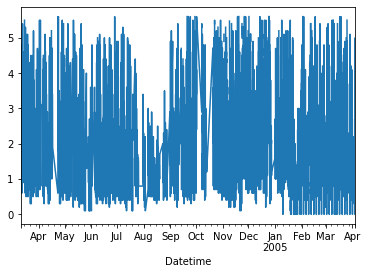

In [37]:
co_refined = co.copy()
co_refined[mask] = np.nan
print(co_refined[mask])
co_refined.plot()

<AxesSubplot:xlabel='Datetime'>

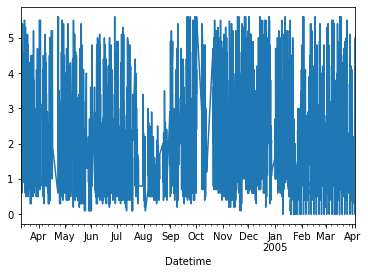

In [38]:
co_refined.interpolate(inplace=True)
co_refined.plot()

In [46]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\YSKIM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO(GT)', ylabel='Density'>

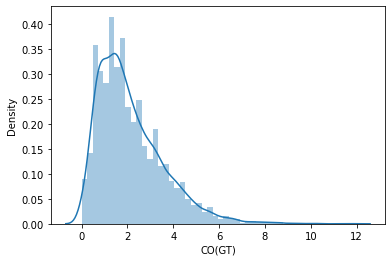

In [39]:
import seaborn as sns
sns.distplot(co)

In [40]:
mean = np.mean(co)
std = np.std(co)
print(mean, std)

2.126146200705357 1.4369815748596482


In [47]:
thres = 3

for i in co:
    z_score = (i-mean) / std
    if (np.abs(z_score) > thres):
        print(z_score)

3.3221398818289734
3.113368937755246
4.157223658123882
4.087633343432639
3.0437786230640036
3.113368937755246
3.8092720846676698
3.182959252446488
3.113368937755246
3.600501140593942
3.5309108259027
3.0437786230640036
3.0437786230640036
3.182959252446488
3.0437786230640036
3.600501140593942
3.182959252446488
3.7396817699764275
3.0437786230640036
3.182959252446488
3.3917301965202156
4.087633343432639
3.878862399358912
3.2525495671377302
4.36599460219761
3.2525495671377302
4.018043028741397
4.36599460219761
4.087633343432639
4.36599460219761
5.131488063801275
3.0437786230640036
3.113368937755246
3.7396817699764275
3.2525495671377302
4.018043028741397
4.087633343432639
4.922717119727547
3.3917301965202156
3.786075313103922
4.180420429687629
4.574765546271336
4.157223658123882
4.087633343432639
3.113368937755246
3.2525495671377302
3.9484527140501537
5.618620266639971
3.113368937755246
3.7396817699764275
3.5309108259027
4.296404287506367
4.505175231580093
3.3221398818289734
3.04377862306400

In [44]:
outliers = co.loc[np.abs((co-mean)/std)>3].copy()
outliers

Datetime
2004-03-11 19:00:00    6.9
2004-03-12 20:00:00    6.6
2004-03-15 09:00:00    8.1
2004-03-15 19:00:00    8.0
2004-03-15 20:00:00    6.5
                      ... 
2005-03-14 19:00:00    6.5
2005-03-14 20:00:00    6.5
2005-03-15 20:00:00    7.4
2005-03-23 20:00:00    7.2
2005-03-24 20:00:00    7.5
Name: CO(GT), Length: 116, dtype: float64

In [56]:
mask = co.index.isin(outliers.index)
mask

array([False, False, False, ..., False, False, False])

C:\Users\YSKIM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\YSKIM\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


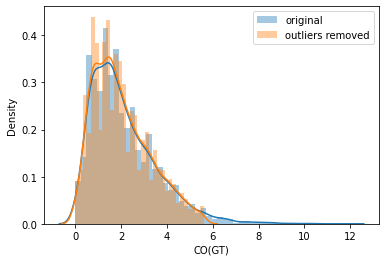

In [50]:
sns.distplot(co, axlabel='CO(GT)', label='original')
sns.distplot(co[~mask], label='outliers removed')
plt.legend(loc='best')

In [62]:
floor = co.quantile(0.1)
cap = co.quantile(0.9)
co.loc[co < floor] = floor
co.loc[co > cap] = cap

<AxesSubplot:xlabel='Datetime'>

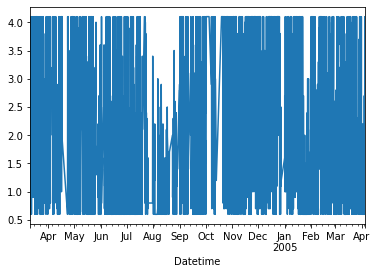

In [63]:
co.plot()